In [265]:
import FFT
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

In [159]:
#Import LIGODATA-func
def loadLIGOdata(filename):
    f = h5py.File(filename, "r")
    strain = f['strain/Strain'][...]
    t0 = f['strain/Strain'].attrs['Xstart']
    dt = f['strain/Strain'].attrs['Xspacing']
    t = t0 + dt * np.arange(strain.shape[0])
    f.close()
    return t, strain

In [160]:
t_h,strain_h=loadLIGOdata('Han.hdf5') #Hanford Data
t_l,strain_l=loadLIGOdata('Liv.hdf5') #Livingston Data
ts = t_h[1] - t_h[0] #-- Time between samples
fs = int(1.0 / ts)          #-- Sampling frequency
length = 32  # seconds
freq = np.arange(0, fs, 1.0/length)

In [161]:
freq[1120]

35.0

In [644]:
len(t_h)

131072

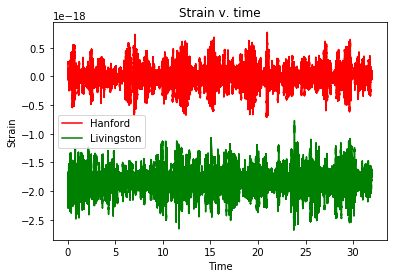

In [640]:
#plt.subplot(12)
#plt.subplot(t_h,strain_h)
#plt.show()
plt.figure()
Hanford,Livingston=plt.plot(t_h-t_h[0], strain_h,'r',t_l-t_l[0], strain_l,'g')
#Livingston=plt.plot()
plt.title('Strain v. time')
plt.xlabel('Time')
plt.ylabel('Strain')
plt.legend([Hanford,Livingston],["Hanford","Livingston"])
#ax2.set_title('Strain v. time - Livingston Data')

plt.show()

In [539]:
H_k=FFT.FFT(strain_h[:]) #Fourier Transform!
L_k=FFT.FFT(strain_l[:])
def P_hh(H_k):
    return H_k*np.conj(H_k) #Power spectrum thing, I think?


/home/mats/CompPhys/hw5-MatsThijssen/FFT.py:33: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.concatenate([x_even + factor[:N / 2] * x_odd,
/home/mats/CompPhys/hw5-MatsThijssen/FFT.py:34: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  x_even + factor[N / 2:] * x_odd])


/home/mats/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


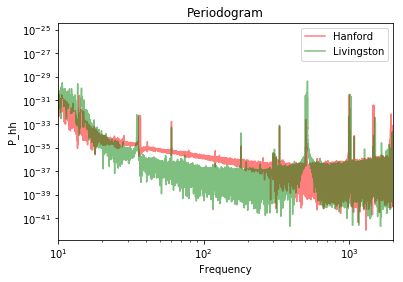

In [670]:
#Periodogram?
H,L=plt.loglog(freq, P_hh(H_k),'r', freq, P_hh(L_k),'g',alpha=0.5)
plt.xlim(10,2000)
plt.title("Periodogram")
plt.xlabel("Frequency")
plt.ylabel("P_hh")
plt.legend([H,L],["Hanford","Livingston"])
plt.show()

In [350]:
def Hstep(f_0,n):
    hey=1/( 1 + (freq[:]/f_0)**(2*n) )
    return hey

def Hgauss(f_0,sigma):
    return 1-np.exp( -((freq-f_0)**2)/(2*sigma**2) )



In [662]:
H_k1=H_k*Hstep(350,18)
H_k1=H_k1*(1-Hstep(35,18))
H_k1=H_k1*Hgauss(60,0.03)
H_k1=H_k1*Hgauss(332,1)
H_k1=H_k1*Hgauss(301,2)
H_k1=H_k1*Hgauss(120,0.02)
H_k1=H_k1*Hgauss(180,0.03)
H_k1=H_k1*Hgauss(256,1)
H_k1=H_k1*Hgauss(36,5)

In [663]:
L_k1=L_k*Hstep(350,18)
L_k1=L_k1*(1-Hstep(35,18))
L_k1=L_k1*Hgauss(35,5)
L_k1=L_k1*Hgauss(60,0.1)
L_k1=L_k1*Hgauss(180,0.2)
L_k1=L_k1*Hgauss(197,0.7)
L_k1=L_k1*Hgauss(305,1.5)
L_k1=L_k1*Hgauss(300,0.05)
L_k1=L_k1*Hgauss(315,1)
L_k1=L_k1*Hgauss(308,1)
L_k1=L_k1*Hgauss(331,2)

/home/mats/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


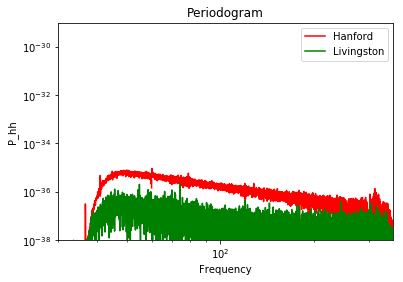

In [664]:
H,L=plt.loglog(freq, P_hh(H_k1),'r', freq, P_hh(L_k1),'g')
plt.xlim(30,360)
plt.ylim(1e-38,1e-29)
plt.title("Periodogram")
plt.xlabel("Frequency")
plt.ylabel("P_hh")
plt.legend([H,L],["Hanford","Livingston"])
plt.show()

/home/mats/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


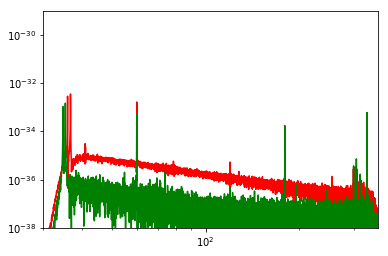

In [647]:
plt.loglog(freq,P_hh(H_k1),'r')
plt.loglog(freq,P_hh(L_k1),'g')
plt.xlim(30,360)
plt.ylim(1e-38,1e-29)
plt.show()

In [665]:
strain_new_h=FFT.iFFT(H_k1)
strain_new_l=FFT.iFFT(L_k1)

/home/mats/CompPhys/hw5-MatsThijssen/FFT.py:46: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.concatenate([x_even + factor[:N / 2] * x_odd,
/home/mats/CompPhys/hw5-MatsThijssen/FFT.py:47: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  x_even + factor[N / 2:] * x_odd])


/home/mats/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


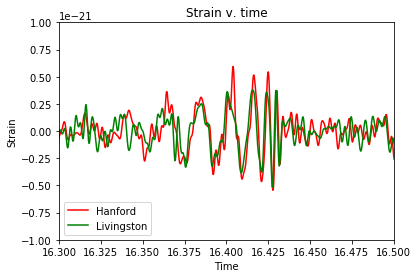

In [668]:
strain_l_shift = -np.roll(strain_new_l,int(0.007*fs))
H,L=plt.plot((t_h-t_h[0]), strain_new_h,'r',(t_l-t_l[0]),strain_l_shift,'g')
plt.legend([H,L],["Hanford","Livingston"])
plt.title('Strain v. time')
plt.ylim(-1e-21,1e-21)
plt.xlim(16.3,16.5)
plt.xlabel("Time")
plt.ylabel("Strain")
plt.show()

4096